[LightGBM] [Info] Number of positive: 1030, number of negative: 1030
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000318 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 965
[LightGBM] [Info] Number of data points in the train set: 2060, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Comparing Models Performance
          model  accuray
0       xgboost   0.8150
1  randomforest   0.9500
2      lightgbm   0.9500
3           knn   0.8375


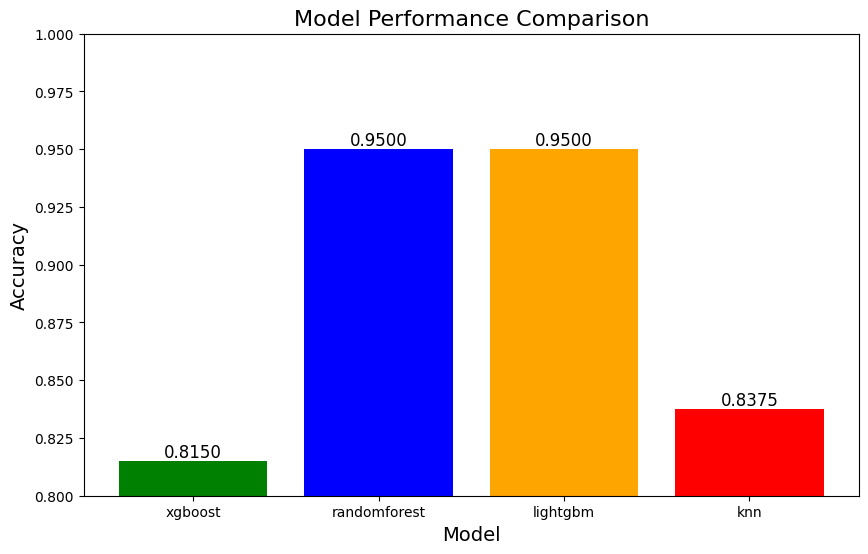

In [ ]:

#All requred libraies
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import lightgbm as lgb
import xgboost as xgb
import pandas as pd
import matplotlib.pyplot as plt

#Reading data set from below link provided
data = pd.read_csv('/content/augmented_dataset.csv')

#categorizing features and target sets
x = data.drop('Outcome',axis=1)
y = data['Outcome']

#splitting based on the requirement

x_train,x_test,y_train,y_test = train_test_split(
    x,y,test_size=0.2,random_state=42,stratify=y
)

#applying external methodes like smote to balance the dataset

smote = SMOTE(random_state=42)
x_train_smote,y_train_smote = smote.fit_resample(x_train,y_train)

#here standarize the feature data

scaler = StandardScaler()
x_train_resampled = scaler.fit_transform(x_train_smote)
x_test = scaler.transform(x_test)

#here i using multiply modes to verifie accuracy.
#xgboost,rf,lightgbm,knn

models = {
    'xgboost':xgb.XGBClassifier(
        eval_metric = 'logloss' , random_state=42 , learning_rate=0.01 , n_estimators=100,
        max_depth=5,
        subsample=0.8,
        colsample_bytree=0.8
    ),
    'randomforest':RandomForestClassifier(
        n_estimators=100,
        random_state=42
    ),
    'lightgbm':lgb.LGBMClassifier(
        random_state=42
    ),
    'knn':KNeighborsClassifier(n_neighbors=5)
}


# my idea is to store the data in list and display in tables,visualization
vis_results = []
for name,model in models.items():
    model.fit(x_train_resampled,y_train_smote)
    y_predict = model.predict(x_test)
    accuracy = accuracy_score(y_test,y_predict)
    vis_results.append({"model":name , "accuray" : accuracy})

#creating compaison table here

result_table = pd.DataFrame(vis_results)
print("Comparing Models Performance")
print(result_table)

#visualizing models accuarcy in bargraph

plt.figure(figsize=(10,6))
plt.bar(result_table['model'],result_table['accuray'],color=['green','blue','orange','red'])
plt.ylim(0.8,1.0)
plt.xlabel('Model',fontsize=14)
plt.ylabel('Accuracy',fontsize=14)
plt.title('Model Performance Comparison',fontsize=16)

#placing bars with accuracy values
for id,ac in enumerate(result_table['accuray']):
    plt.text(id,ac,f'{ac:.4f}',ha='center',va='bottom',fontsize=12)
plt.show()
